In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import parameters as p
import pickle
import anuga
%matplotlib inline

# Allow inline jshtml animations
from matplotlib import rc
rc('animation', html='jshtml')

/tmp/ipykernel_52405/3108422147.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Cargado de datos

In [2]:
''' PARÁMETROS '''

INPUT_FOLDER = os.path.abspath("input")
CICLO = 9
SECTORES = [5, 6]

folder_ciclo = os.path.join(INPUT_FOLDER, f"ciclo_{CICLO}")

In [3]:
''' DESCARGAS '''
suffix_input = '_'.join([str(s) for s in SECTORES])
df_descargas = pd.read_csv(os.path.join(folder_ciclo, "input_sectores_{}.csv".format(suffix_input)), parse_dates=['fecha'])

In [4]:
''' RUTAS '''
ruta_topografia = os.path.join(folder_ciclo, "DEM_04.02.2023_10x10m.asc")
ruta_mascara_tranque = p.RUTA_MASK_TRANQUE
ruta_sector_5 = os.path.join(folder_ciclo, "poligono_sector_5.csv")
ruta_interior = os.path.join(folder_ciclo, "zona_interior_sector_5.csv")
ruta_extension_sector_5 = os.path.join(folder_ciclo, "extension_sector_5.csv")

In [5]:
''' MALLADO '''
res_region = 1024
res_interior = res_region / 2

# Construcción input

In [6]:
df_input = df_descargas[df_descargas.sector == 5]
df_input = df_input[df_input.fecha == df_input.fecha.min()]

In [7]:
# resoluciones_region = [2**x for x in range(7, 11)]

# Ejecución simulación

In [8]:
from simulador import AnugaSW

simulador = AnugaSW(ruta_topografia,
                    ruta_mascara_tranque,
                    ruta_sector_5, ruta_interior,
                    ruta_extension_sector_5,
                    res_region=res_region,
                    res_interior=res_interior)


Figure files for each frame will be stored in figuras


In [9]:
df_input

,fecha,sector,id_punto,coordenada_x,coordenada_y,angulo_polar,tms,tasa_diaria,radio_canaleta
153,2023-03-02,5,29,489215.492474,7.297292e+06,2.425051,22137.258627,0.961598,1.6345
154,2023-03-02,5,32,489082.721325,7.296706e+06,2.536601,22137.258627,0.961598,1.4370
155,2023-03-02,5,33,488926.557163,7.296312e+06,2.907850,22137.258627,0.961598,1.6430
156,2023-03-02,5,37,488770.083732,7.295805e+06,2.377836,44274.517254,1.923196,1.3145


In [10]:
simulador.ejecutar(df_input)

Time = 0.0000 (sec), steps=0 (3s)
Distancias a los bordes: {0: inf, 1: inf}

current_volume 0.0
current_volume 0.0
current_volume 0.0
current_volume 0.0


/home/jorge-ovalle/anuga_core/anuga_jorge/estado.py:101: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self._df_estado = pd.concat([self._df_estado, df_aux], ignore_index=True)


Time = 400.0000 (sec), delta t = 1000.00000000 (s), steps=1 (0s)
Distancias a los bordes: {0: 479.092154173782, 1: 852.4007012872297}

current_volume 248.37673556995915
current_volume 465.4050028061373
current_volume 301.3859933700578
current_volume 270.5017911940949
current_volume 144.22901608872067
current_volume 413.21502449438333
current_volume 216.6988056662801
current_volume 159.4224650534302
current_volume 103.03557017528784
current_volume 371.3141503729886
current_volume 174.0568520531708
current_volume 119.71183767167078
current_volume 76.67097691262556
current_volume 329.73077757051885
current_volume 142.6110565124408
current_volume 95.6353210002366
current_volume 60.00937962492743
current_volume 290.95090231777914
current_volume 118.81518568846526
current_volume 79.60610194342216
current_volume 49.10454261862549
current_volume 258.2482330752849
current_volume 100.4719073710443
current_volume 69.25826692769263
current_volume 41.454948984465645
current_volume 228.6620864298639

In [ ]:
# columns = ['tiempo_sim', 'tiempo_inicio_paso', 'elapsed']
# df = pd.DataFrame(columns=['tiempo_sim', 'tiempo_inicio_paso',
#                                                 'elapsed'])

# df1 = pd.concat([df, pd.DataFrame(data = [[0,0,1]], columns=columns)], axis=0)



# arr = simulador.domain.quantities['elevation'].save_to_array(cellsize=10,
#                                                    easting_min=simulador.topografia.dem.columns.min(),
#                                                    northing_min=simulador.topografia.dem.index.min(),
#                                                    easting_max=simulador.topografia.dem.columns.max(),
#                                                    northing_max=simulador.topografia.dem.index.max())

# Debugging

## Cargado

In [11]:
# DEBUGGING 

from copy import deepcopy
dominio_old = deepcopy(simulador.dominio_old)
dominio_new = deepcopy(simulador.dominio_new)
dplotter_old = deepcopy(simulador.dplotter_old)
dplotter_new = deepcopy(simulador.dplotter_new)

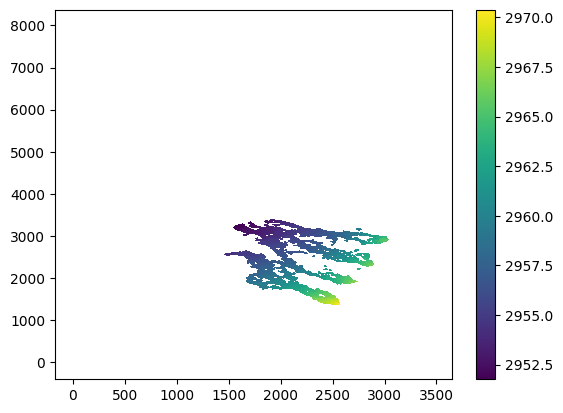

In [12]:
stage_old = dominio_old.quantities['stage'].centroid_values
plt.tripcolor(dplotter_old.triang, stage_old, cmap='viridis')
plt.colorbar()

In [16]:
elevation_old = dominio_old.quantities['elevation'].centroid_values
depth_old = stage_old - elevation_old

In [17]:
wet_indices = dominio_old.get_wet_elements()
areas = dominio_old.areas[wet_indices]

volume_old = (areas * depth_old[wet_indices]).sum()


In [18]:
volume_old

34361.41813784063

In [19]:
print('Número de wet triangles_old proporcion:', np.sum(depth_old > 1e-12) / len(depth_old))

Número de wet triangles_old proporcion: 0.26369515258404147


In [20]:
stage_new = dominio_new.quantities['stage'].centroid_values
elevation_new = dominio_new.quantities['elevation'].centroid_values
depth_new = stage_new - elevation_new

print('Número de wet triangles_new proporcion:', np.sum(depth_new > 1e-12) / len(depth_new))

Número de wet triangles_new proporcion: 0.9482036665611034


## Convertir `stage` a archivo `.asc`

In [699]:
from collections import defaultdict
from topografia import Topografia
from procesamiento_archivos import df_to_asc

def get_intersection_area(depth_topo, xc, yc, cellsize):

    # Generamos una lista de los puntos del cuadrado centroide

    puntos = [(xc - cellsize/2, yc - cellsize/2, 1, 1),
              (xc + cellsize/2, yc - cellsize/2, -1, 1),
              (xc + cellsize/2, yc + cellsize/2, -1, -1),
              (xc - cellsize/2, yc + cellsize/2, 1, -1)]
    
    indices_topo = defaultdict(set)
    areas_topo = {}

    # Iteramos sobre los puntos rellenando primero indices_topo
    for xe, ye, signox, signoy in puntos:
        try:
            # Buscamos las coordenadas proyectadas
            x, y = depth_topo.determinar_proyeccion(xe, ye)
            indices_topo[(x, y)].add((xe, ye, signox, signoy))
        except:
            continue

    for xy, puntos in indices_topo.items():
        puntos = list(puntos)
        pivot_point = puntos[0]
        signox, signoy = pivot_point[2], pivot_point[3]

        inf_limitx = max(min(p[0] for p in puntos), xy[0])
        sup_limitx = min(max(p[0] for p in puntos), xy[0] + depth_topo.cellsize)
        rangex = sup_limitx - inf_limitx
        if rangex == 0:
             # implica que hay un punto adentro nomás
            if signox == 1:
                base = xy[0] + depth_topo.cellsize - pivot_point[0]
            else:
                base = pivot_point[0] - xy[0]
        
        else:
            base = rangex
        
        
        inf_limity = max(min(p[1] for p in puntos), xy[1])
        sup_limity = min(max(p[1] for p in puntos), xy[1] + depth_topo.cellsize)
        rangey = sup_limity - inf_limity

        if rangey == 0:
            if signoy == 1:
                altura = xy[1] + depth_topo.cellsize - pivot_point[1]
            else:
                altura = pivot_point[1] - xy[1]
        else:
            altura = rangey

        area = base * altura
        areas_topo[xy] = area

    return areas_topo

def crear_dem(xmin, xmax, ymin, ymax, cellsize):
    ncols = int((xmax - xmin) / cellsize) + 1
    nrows = int((ymax- ymin) / cellsize) + 1
    headers = np.arange(xmin, xmin + cellsize * ncols, cellsize)
    index = np.flip(np.arange(ymin, ymin + cellsize * nrows, cellsize), axis=0)

    return pd.DataFrame(data=np.zeros((nrows, ncols)), columns=headers, index=index)

def stage_to_asc(simulador: AnugaSW, dominio_old: anuga.Domain, cellsize, filename: str):
    # Creamos un DEM para el stage 
    # cellsize = np.sqrt(simulador.res_interior)
    topo = simulador.topografia
    stage_dem = crear_dem(topo.dem.columns.min(), topo.dem.columns.max(), topo.dem.index.min(), topo.dem.index.max(), cellsize)

    # Seteamos las partes que no tienen datos (el resto se deja en 0)
    for x in stage_dem.columns:
        for y in stage_dem.index:
            value = topo.calcular_altura_punto(x, y)
            if np.isnan(value):
                stage_dem.loc[y, x] = value
    
    # Creamos una topografia para el stage y para el area
    stage_topo = Topografia(dem=deepcopy(stage_dem))
    area_topo = Topografia(dem=deepcopy(stage_dem))

    wet_indices = dominio_old.get_wet_elements()
    wet_centroids = dominio_old.get_centroid_coordinates(absolute=True)[wet_indices]
    stage = dominio_old.quantities['stage'].centroid_values


    for idx, (xc, yc) in zip(wet_indices, wet_centroids):
        s = stage[idx] 
        areas_topo = get_intersection_area(stage_topo, xc, yc, cellsize)
        # print(areas_topo)
        # print()
        for xy, area in areas_topo.items():
            value = area * s + stage_topo.get_value(*xy)
            stage_topo.set_value(*xy, value)

            area_value = area + area_topo.get_value(*xy)

            area_topo.set_value(*xy, area_value)
    
    # Todos los valores que se mantienen en 0 son NaN
    stage_topo.dem[area_topo.dem == 0] = np.nan
    area_topo.dem[area_topo.dem == 0] = np.nan

    # Finalmente, dividimos stage_topo por area_topo
    stage_topo.dem = stage_topo.dem / area_topo.dem


    # Guardamos el DEM
    df_to_asc(stage_topo.dem, filename)
    return stage_topo, area_topo

In [451]:
cellsizes = range(10, int(np.sqrt(simulador.res_interior)), 2)
volumes = []

for cellsize in cellsizes:
    stage_to_asc(simulador, dominio_old, cellsize, 'stage_dem.asc')

    dominio_aux = deepcopy(dominio_new)
    dominio_aux.set_quantity('stage', filename='stage_dem.asc', location='centroids')

    depth_aux = dominio_aux.quantities['stage'].centroid_values - dominio_aux.quantities['elevation'].centroid_values
    wet_indices = dominio_aux.get_wet_elements()
    areas = dominio_aux.areas[wet_indices]

    volume_aux = (areas * depth_aux[wet_indices]).sum()
    volumes.append(volume_aux)

In [452]:
for cellsize, volume in zip(cellsizes, volumes):
    print(cellsize, volume)
    print('Error:', (volume - volume_old) / volume_old)
    print()

10 31603.824623695637
Error: -0.08025261073576537

12 53006.15065129307
Error: 0.5426066071737554

14 71220.67749708249
Error: 1.072693193609797

16 80328.88729601272
Error: 1.3377640286490464

18 88934.66182542083
Error: 1.5882127876288445

20 96518.72836701109
Error: 1.8089273841908031



In [441]:
dominio_aux.get_nodes(absolute=True).shape

(14407, 2)

In [436]:
dominio_aux.get_triangle_containing_poin

AttributeError: 'Domain' object has no attribute 'get_triangle_vertices'

In [442]:
dominio_aux.get_triangle_containing_point(0,0 )

TypeError: Mesh.get_triangle_containing_point() takes 2 positional arguments but 3 were given

In [423]:
cellsizes[-1:]

range(20, 22, 2)

In [392]:
# Pasamos el stage a asc
stage_topo, area_topo = stage_to_asc(simulador, dominio_old, dplotter_old, 'stage_dem.asc')

In [384]:
np.max(stage_topo.dem)

2970.331104896635

In [337]:
s[s == 0] = np.nan

In [398]:
dominio_aux = deepcopy(dominio_new)
# dominio_aux.set_quantity('elevation', filename='topo.asc', location='centroids')
dominio_aux.set_quantity('stage', filename='stage_dem.asc', location='centroids')

dplotter_aux = anuga.Domain_plotter(dominio_aux)

Figure files for each frame will be stored in _plot


In [386]:
stage = dominio_aux.quantities['stage'].centroid_values

In [320]:
dppo

array([nan, nan, nan, ..., nan, nan, nan])

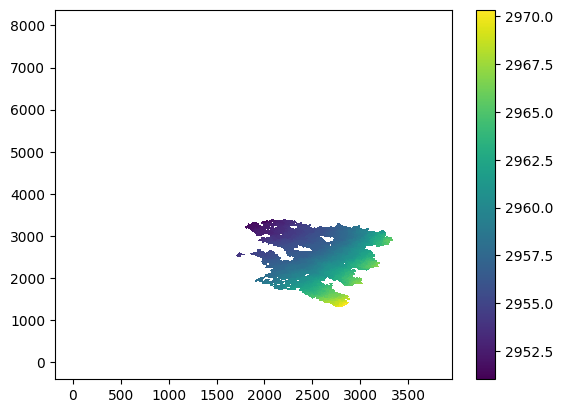

In [399]:
stage = dominio_aux.quantities['stage'].centroid_values
plt.tripcolor(dplotter_aux.triang, stage, cmap='viridis')
plt.colorbar()

In [400]:
depth_aux = dominio_aux.quantities['stage'].centroid_values - dominio_aux.quantities['elevation'].centroid_values

In [403]:
wet_indices = dominio_aux.get_wet_elements()
areas = dominio_aux.areas[wet_indices]

volume_aux = (areas * depth_aux[wet_indices]).sum()

In [404]:
volume_aux

76879.67440925553

In [228]:
depth_aux = stage_new - dominio_new.quantities['elevation'].centroid_values

mask = depth_aux > 0.01
depth_aux[~mask] = 0

In [234]:
depth_aux[depth_aux > 0].min()

0.010000171127558133

In [455]:
dominio_old.triangles.shape

(18711, 3)

In [456]:
dominio_old.centroid_coordinates.shape

(18711, 2)

## Stage with triangles

In [13]:
# Parámetros
POND_RADIO = 4
BOX_MARGIN = np.sqrt(simulador.res_region)

In [14]:
# MUY LENTO
from shapely import Polygon

wet_indices = dominio_old.get_wet_elements()
wet_triangles_aux = dominio_old.triangles[wet_indices]
wet_centroids = dominio_old.get_centroid_coordinates(absolute=True)[wet_indices]

nodes = dominio_old.get_nodes(absolute=True)
wet_triangles = []

depths = dominio_old.quantities['stage'].centroid_values - dominio_old.quantities['elevation'].centroid_values
wet_depths = depths[wet_indices]
wet_xmoms = dominio_old.quantities['xmomentum'].centroid_values[wet_indices]
wet_ymoms = dominio_old.quantities['ymomentum'].centroid_values[wet_indices]

min_x = np.inf
min_y = np.inf
max_x = -1
max_y = -1

for idx in range(len(wet_triangles_aux)):
    triangle = wet_triangles_aux[idx]
    centroid = wet_centroids[idx]
    h = wet_depths[idx]
    mx = wet_xmoms[idx]
    my = wet_ymoms[idx]

    t = []
    for tidx in triangle:
        t.append(nodes[tidx])
    
    local_min_x, local_min_y = np.min(t, axis=0)
    local_max_x, local_max_y = np.max(t, axis=0)

    min_x = min(min_x, local_min_x)
    min_y = min(min_y, local_min_y)
    max_x = max(max_x, local_max_x)
    max_y = max(max_y, local_max_y)

    max_dist = np.max(np.linalg.norm(t - centroid, axis=1))
    radio = max_dist * POND_RADIO

    # Creamos poligono
    p = (Polygon(t), h, mx, my, radio)
    wet_triangles.append(p)

# for triangle, centroid, h in zip(wet_triangles_aux, wet_centroids, wet_depths):
#     t = []
#     for idx in triangle:
#         t.append(nodes[idx])
    
#     local_min_x, local_min_y = np.min(t, axis=0)
#     local_max_x, local_max_y = np.max(t, axis=0)

#     min_x = min(min_x, local_min_x)
#     min_y = min(min_y, local_min_y)
#     max_x = max(max_x, local_max_x)
#     max_y = max(max_y, local_max_y)

#     max_dist = np.max(np.linalg.norm(t - centroid, axis=1))
#     radio = max_dist * POND_RADIO

#     # Creamos poligono
#     p = (Polygon(t), h, radio)
#     wet_triangles.append(p)

In [15]:
def in_box(x, y, min_x, min_y, max_x, max_y, margin=BOX_MARGIN):
    return (x >= min_x - margin) and (x <= max_x + margin) and (y >= min_y - margin) and (y <= max_y + margin)

def distance(x, y, x0, y0):
    return np.sqrt((x - x0)**2 + (y - y0)**2)

In [16]:
nodes = dominio_new.get_nodes(absolute=True)
triangles_aux = dominio_new.triangles
centroids = dominio_new.get_centroid_coordinates(absolute=True)

triangles = []
obj_indices = []
comparison_points = []
for idx in range(len(centroids)):
    t = []
    inside_box = [in_box(centroids[idx][0], centroids[idx][1], min_x, min_y, max_x, max_y)]
    for node_idx in triangles_aux[idx]:
        x, y = nodes[node_idx]
        inside_box.append(in_box(x, y, min_x, min_y, max_x, max_y))

        t.append(nodes[node_idx])
    inside_box = np.any(inside_box)
    
    if inside_box:
        triangles.append(Polygon(t))
        comparison_points.append(t + [centroids[idx]])
        obj_indices.append(idx)

comparison_points = np.array(comparison_points)

In [17]:
depths_aux = [0] * len(centroids)
xmoms_aux = [0] * len(centroids)
ymoms_aux = [0] * len(centroids)
areas_aux = [0] * len(centroids)

total = len(wet_triangles)
i = 1

for wet_triangle in wet_triangles:
    wt, h, mx, my, radio = wet_triangle
    print('Procesando triángulo húmedo {}/{}'.format(i, total))
    i += 1

    wet_centroid = np.array([wt.centroid.x, wt.centroid.y])
    tidxs = np.where(np.any(np.linalg.norm(comparison_points - wet_centroid, axis=2) < radio, axis=1))[0]
    tidxs = tidxs.astype(int)
    # print(len(tidxs))

    selected_triangles = [triangles[idx] for idx in tidxs]
    selected_indices = [obj_indices[idx] for idx in tidxs]


    for t, idx in zip(selected_triangles, selected_indices):
            area = wt.intersection(t).area
            # print(area)

            areas_aux[idx] += area 
            depths_aux[idx] += h * area
            xmoms_aux[idx] += mx * area
            ymoms_aux[idx] += my * area



areas_aux = np.array(areas_aux)      
depths_aux = np.array(depths_aux)
xmoms_aux = np.array(xmoms_aux)
ymoms_aux = np.array(ymoms_aux)

wet_indices_aux = np.where(areas_aux > 0)[0]

areas_aux2 = dominio_new.areas

depths_aux[wet_indices_aux] = depths_aux[wet_indices_aux] / areas_aux2[wet_indices_aux]
xmoms_aux[wet_indices_aux] = xmoms_aux[wet_indices_aux] / areas_aux2[wet_indices_aux]
ymoms_aux[wet_indices_aux] = ymoms_aux[wet_indices_aux] / areas_aux2[wet_indices_aux]

depth_mask = depths_aux < 1e-12
depths_aux[depth_mask] = np.nan
xmoms_aux[depth_mask] = np.nan
ymoms_aux[depth_mask] = np.nan

Procesando triángulo húmedo 1/4713
Procesando triángulo húmedo 2/4713
Procesando triángulo húmedo 3/4713
Procesando triángulo húmedo 4/4713
Procesando triángulo húmedo 5/4713
Procesando triángulo húmedo 6/4713
Procesando triángulo húmedo 7/4713
Procesando triángulo húmedo 8/4713
Procesando triángulo húmedo 9/4713
Procesando triángulo húmedo 10/4713
Procesando triángulo húmedo 11/4713
Procesando triángulo húmedo 12/4713
Procesando triángulo húmedo 13/4713
Procesando triángulo húmedo 14/4713
Procesando triángulo húmedo 15/4713
Procesando triángulo húmedo 16/4713
Procesando triángulo húmedo 17/4713
Procesando triángulo húmedo 18/4713
Procesando triángulo húmedo 19/4713
Procesando triángulo húmedo 20/4713
Procesando triángulo húmedo 21/4713
Procesando triángulo húmedo 22/4713
Procesando triángulo húmedo 23/4713
Procesando triángulo húmedo 24/4713
Procesando triángulo húmedo 25/4713
Procesando triángulo húmedo 26/4713
Procesando triángulo húmedo 27/4713
Procesando triángulo húmedo 28/4713
P

In [32]:
a1 = areas_aux[wet_indices_aux]
a2 = dominio_new.areas[wet_indices_aux]

In [37]:
d = np.abs(a1 - a2)

In [42]:
d[d > 1e-2].min()

0.014205112665706565

In [710]:
np.where(dominio_aux.areas[idxs] < areas_aux[idxs])[0]

array([   6,    8,    9, ..., 5013, 5014, 5016])

In [711]:
areas_aux[idxs][6]

273.6101494132466

In [712]:
dominio_aux.areas[idxs][6]

273.6101494128816

In [665]:
arr = np.array([1, 2, 3, 4, 5])     

np.where(arr > 4)

(array([4]),)

In [21]:
dominio_aux = deepcopy(dominio_new)
elevation = dominio_aux.quantities['elevation'].centroid_values
dominio_aux.set_quantity('stage', numeric=elevation + depths_aux, location='centroids')
dominio_aux.set_quantity('xmomentum', numeric=xmoms_aux, location='centroids')
dominio_aux.set_quantity('ymomentum', numeric=ymoms_aux, location='centroids')

dplotter_aux = anuga.Domain_plotter(dominio_aux)

Figure files for each frame will be stored in _plot


In [22]:
wet_indices = dominio_aux.get_wet_elements()
areas = dominio_aux.areas[wet_indices]

volume_aux = (areas * depths_aux[wet_indices]).sum()

In [23]:
volume_aux

34361.3427134108

In [640]:
wet_indices.shape

(4713,)

In [631]:
wet_indices_aux

array([   71,    73,    77, ...,  8673,  8674, 14241])

In [653]:
areas

array([339.24432899, 494.87467762, 588.49196477, ..., 261.45454041,
       353.79704281, 454.36115494])

In [604]:
areas_aux2

array([ 666.07025096,  281.90657999,  622.35552089, ...,  221.6774564 ,
        403.5604147 , 1974.92058912])

In [718]:
volume_aux

37806.455348809846

In [33]:
xmoms_aux2 = xmoms_aux[~np.isnan(xmoms_aux)]
ymoms_aux2 = ymoms_aux[~np.isnan(ymoms_aux)]


In [31]:
print(np.min(dominio_old.quantities['xmomentum'].centroid_values), np.max(dominio_old.quantities['xmomentum'].centroid_values))

print(np.min(dominio_old.quantities['ymomentum'].centroid_values), np.max(dominio_old.quantities['ymomentum'].centroid_values))

-0.0560303315856525 0.014330627023059202
-0.031288407820488105 0.0728204388886648


In [32]:
print(np.min(xmoms_aux2), np.max(xmoms_aux2))
print(np.min(ymoms_aux2), np.max(ymoms_aux2))

-0.05603033158511105 0.014330627023000322
-0.026142593575727725 0.05389368661503811


In [74]:
depth_aux = deepcopy(depths_aux)

depth_aux[np.isnan(depth_aux)] = 0

In [75]:
depth_aux.max()

0.5229039826620941

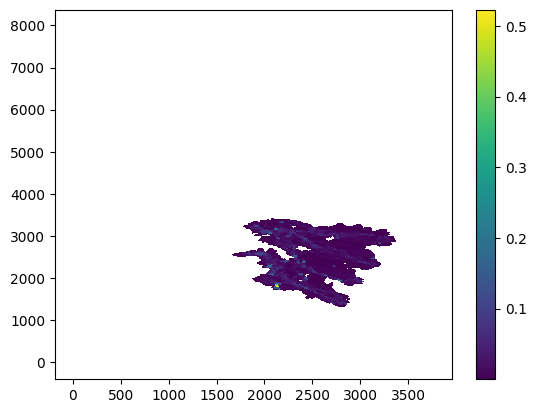

In [53]:
stage = dominio_aux.quantities['stage'].centroid_values - dominio_aux.quantities['elevation'].centroid_values
plt.tripcolor(dplotter_aux.triang, stage, cmap='viridis')
plt.colorbar()

In [ ]:
# triangs_old = dominio_old.triangles
# nodes_old = dominio_old.get_nodes(absolute=True)
# triangs_new = dominio_new.triangles
# nodes_new = dominio_new.get_nodes(absolute=True)

# # Creamos los poligonos
# triangulos_old = []
# triangulos_new = []

# for i in range(triangs_old.shape[0]):
#     t_old = []
#     for idx in triangs_old[i]:
#         t_old.append(nodes_old[idx])
#     triangulos_old.append(Polygon(t_old))

#     t_new = []
#     for idx in triangs_new[i]:
#         t_new.append(nodes_new[idx])
#     triangulos_new.append(Polygon(t_new))

# stage_aux = []

# for ntriang in triangulos_new:
#     h = 0
#     total_area = 0
#     for otriang in triangulos_old:
#         inter_area = ntriang.intersection(otriang).area
#         h += inter_area * stage_old[triangulos_old.index(otriang)]

#         total_area += inter_area
#     stage_aux.append(h/total_area)


    # t_old = Polygon(simulador.domain.get_vertex_coordinates(triangle_id=0))

# Experimentos varios

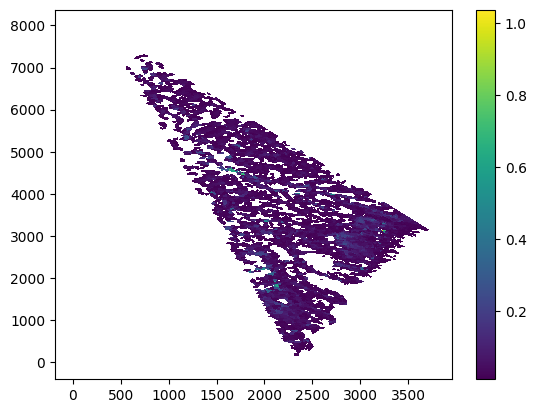

In [242]:
# depth_new = stage_aux - dominio_new.quantities['elevation'].centroid_values

dplotter_new.triang.set_mask(depth_aux <= 0.01)
plt.tripcolor(dplotter_new.triang, depth_aux, cmap='viridis')
plt.colorbar()


In [245]:
np.isinf(depth_aux).sum()

9663

In [26]:
from copy import deepcopy
hola = deepcopy(simulador.stage_new)

In [16]:
print('Nans:', np.isnan(stage_old).sum())
print('Inf:', np.isinf(stage_old).sum())

Nans: 0
Inf: 0


In [17]:
print('Nans:', np.isnan(stage_new).sum())
print('Inf:', np.isinf(stage_new).sum())

Nans: 370
Inf: 9663


In [123]:
from shapely import Polygon

In [130]:
# MUY LENTO

triangs_old = dominio_old.triangles
nodes_old = dominio_old.get_nodes(absolute=True)
triangs_new = dominio_new.triangles
nodes_new = dominio_new.get_nodes(absolute=True)

# Creamos los poligonos
triangulos_old = []
triangulos_new = []

for i in range(triangs_old.shape[0]):
    t_old = []
    for idx in triangs_old[i]:
        t_old.append(nodes_old[idx])
    triangulos_old.append(Polygon(t_old))

    t_new = []
    for idx in triangs_new[i]:
        t_new.append(nodes_new[idx])
    triangulos_new.append(Polygon(t_new))

stage_aux = []

for ntriang in triangulos_new:
    h = 0
    total_area = 0
    for otriang in triangulos_old:
        inter_area = ntriang.intersection(otriang).area
        h += inter_area * stage_old[triangulos_old.index(otriang)]

        total_area += inter_area
    stage_aux.append(h/total_area)


    # t_old = Polygon(simulador.domain.get_vertex_coordinates(triangle_id=0))

KeyboardInterrupt: 

In [144]:

triangs_old = dominio_old.triangles
nodes_old = dominio_old.get_nodes(absolute=True)
triangs_new = dominio_new.triangles
nodes_new = dominio_new.get_nodes(absolute=True)

# Creamos los poligonos
triangulos_old = []
triangulos_new = []

for i in range(triangs_old.shape[0]):
    t_old = []
    for idx in triangs_old[i]:
        t_old.append(nodes_old[idx])
    triangulos_old.append(t_old)

    t_new = []
    for idx in triangs_new[i]:
        t_new.append(nodes_new[idx])
    triangulos_new.append(t_new)

In [184]:
depth = stage_old - dominio_old.quantities['elevation'].centroid_values

In [190]:
(depth < 1e-10).sum()

13797

In [210]:
from scipy.interpolate import RBFInterpolator
interpolador = RBFInterpolator(y=dominio_old.get_centroid_coordinates(absolute=True), d=depth)

In [223]:
from scipy.interpolate import LinearNDInterpolator

centroids = dominio_old.get_centroid_coordinates(absolute=True)
wet_indices = dominio_old.get_wet_elements()
wet_centroids = centroids[wet_indices]

wet_stage = dominio_old.quantities['stage'].centroid_values[wet_indices]

interpolador = LinearNDInterpolator(wet_centroids, wet_stage, fill_value=0)

stage_aux = interpolador(dominio_new.get_centroid_coordinates(absolute=True))

In [222]:
(stage_aux == 0).sum()

22030

In [ ]:
dominio_old.set_minimum_allowed_height()

In [160]:
from matplotlib.tri import Triangulation, LinearTriInterpolator, CubicTriInterpolator

#you can add keyword triangles here if you have the triangle array, size [Ntri,3]
triobj_old = Triangulation(triangles=triangs_old, x=nodes_old[:,0], y=nodes_old[:,1])

# Valores en los vertices
stage_old = dominio_old.quantities['stage'].get_values(location='vertices')

# #linear interpolation
fz = LinearTriInterpolator(triobj_old, stage_old)
Z = fz(0, 0)

ValueError: z array must have same length as triangulation x and y arrays

In [172]:
triobj_old.get_masked_triangles()

array([[2969.5285224 , 2969.5285224 , 2969.5285224 ],
       [2972.4552859 , 2972.4552859 , 2972.4552859 ],
       [2972.55326892, 2972.55326892, 2972.55326892],
       ...,
       [2940.49397753, 2940.49397753, 2940.49397753],
       [2940.53992953, 2940.53992953, 2940.53992953],
       [2940.51091838, 2940.51091838, 2940.51091838]])

In [171]:
triobj_old

In [133]:
wet_indices = dominio_old.get_wet_elements()

In [139]:
dominio_old.triangles[wet_indices]

array([[ 545,  549,  483],
       [2900, 2015, 1930],
       [1389, 7251, 1390],
       ...,
       [5792, 9489, 5689],
       [7981, 9489,  509],
       [7956, 9520, 7954]])

In [120]:
triangs_old = dominio_old.get_nodes(absolute=True)

In [162]:
triangs_old.shape

(18711, 3)

In [126]:
dominio_old.get_vertex_coordinates(triangle_id=0)

array([[2339.91724216, 1233.77231969],
       [2345.36691871, 1273.51051837],
       [2305.23712105, 1245.77551753]])

In [64]:
aux_stage = dominio_new.quantities['stage'].get_values(interpolation_points=dominio_old.get_centroid_coordinates(absolute=True))

In [65]:
# dominio_old.set_quantity('stage', numeric=aux_stage, location='centroids')

stage_old = dominio_old.quantities['stage'].centroid_values

In [66]:
(aux_stage != stage_old).sum()

18213

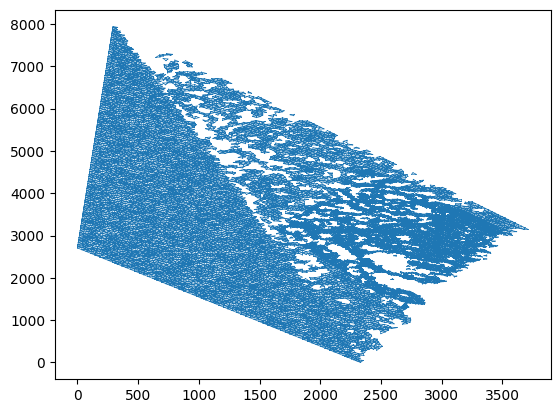

In [69]:
plt.triplot(dplotter_new.triang, linewidth=0.5)

In [96]:
from shapely import Polygon

# Creamos un polígono con las coordenadas de los centroides
poligono1 = Polygon(simulador.domain.get_vertex_coordinates(triangle_id=0))
poligono2 = Polygon(simulador.domain.get_vertex_coordinates(triangle_id=1))

In [95]:
simulador.domain.areas

array([824.19862193, 275.83180723, 727.26806099, ..., 517.4030943 ,
       479.29731789, 391.3754843 ])

In [97]:
inter = poligono1.intersection(poligono2)

In [99]:
inter.area

0.0